In [2]:
# Lab 7 Learning rate and Evaluation
import tensorflow as tf
import random
import matplotlib.pyplot as plt
tf.set_random_seed(777)  # for reproducibility

from tensorflow.examples.tutorials.mnist import input_data
# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Epoch: 0001 cost = 2.650599153
Epoch: 0002 cost = 1.058773501
Epoch: 0003 cost = 0.847278251
Epoch: 0004 cost = 0.744744407
Epoch: 0005 cost = 0.680621456
Epoch: 0006 cost = 0.634814307
Epoch: 0007 cost = 0.600311660
Epoch: 0008 cost = 0.572478896
Epoch: 0009 cost = 0.549792944
Epoch: 0010 cost = 0.529850901
Epoch: 0011 cost = 0.513439542
Epoch: 0012 cost = 0.499074848
Epoch: 0013 cost = 0.486023951
Epoch: 0014 cost = 0.474183300
Epoch: 0015 cost = 0.463929412
Learning finished
Accuracy:  0.89
Label:  [4]
Prediction:  [4]


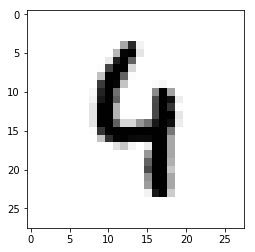

In [6]:

nb_classes = 10

# MNIST data image of shape 28 * 28 = 784
X = tf.placeholder(tf.float32, [None, 784])
# 0 - 9 digits recognition = 10 classes
Y = tf.placeholder(tf.float32, [None, nb_classes])

W = tf.Variable(tf.random_normal([784, nb_classes]))
b = tf.Variable(tf.random_normal([nb_classes]))

# Hypothesis (using softmax)
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# Test model
is_correct = tf.equal(tf.arg_max(hypothesis, 1), tf.arg_max(Y, 1))
# Calculate accuracy
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

# parameters
training_epochs = 15
batch_size = 100

with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())
    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0
        total_batch = int(mnist.train.num_examples / batch_size)

        # 전체 사이즈에서 batch_size를 나누면 iterations가 나온다
        # Total Dataset / batch_size = N iterations/1 epoch
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            c, _ = sess.run([cost, optimizer], feed_dict={
                            X: batch_xs, Y: batch_ys})
            avg_cost += c / total_batch

        print('Epoch:', '%04d' % (epoch + 1),
              'cost =', '{:.9f}'.format(avg_cost))

    print("Learning finished")

    # Test the model using test sets
    #                      ABC.eval() = sess.run(ABC)
    print("Accuracy: ", accuracy.eval(session=sess, feed_dict={
          X: mnist.test.images, Y: mnist.test.labels}))

    # Get one and predict
    
    # 랜덤한 숫자 하나 읽어오고
    r = random.randint(0, mnist.test.num_examples - 1) 
    
    # Test할 라벨의 data를 하나 불러오고
    print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
    
    # 예측한 값을 불러옴
    print("Prediction: ", sess.run(
        tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1]}))

    # 화면에 테스트 이미지를 띄움
    plt.imshow(
        mnist.test.images[r:r + 1].reshape(28, 28),
        cmap='Greys',
        interpolation='nearest')
    plt.show()